<a href="https://colab.research.google.com/github/AnetaCzy/PUM_CzyzewskaDudziakHreczany/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [78]:
df = pd.read_csv("/content/winequality-white.csv", sep = ";" , encoding= 'utf-8')

In [88]:
df.shape
df.info()
df.head()
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3957 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3957 non-null   float64
 1   volatile acidity      3957 non-null   float64
 2   citric acid           3957 non-null   float64
 3   residual sugar        3957 non-null   float64
 4   chlorides             3957 non-null   float64
 5   free sulfur dioxide   3957 non-null   float64
 6   total sulfur dioxide  3957 non-null   float64
 7   density               3957 non-null   float64
 8   pH                    3957 non-null   float64
 9   sulphates             3957 non-null   float64
 10  alcohol               3957 non-null   float64
 11  quality               3957 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 401.9 KB


In [80]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.rstrip('_')
    if df[column].str.replace('.', '').str.isnumeric().all():
            df[column] = df[column].astype(float)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4895 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         

<ipython-input-80-0bb4d3053a13>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if df[column].str.replace('.', '').str.isnumeric().all():


In [71]:
print(df['alcohol'].unique())

[   8.8           9.5          10.1           9.9           9.6
   11.           12.            9.7          10.8          12.4
   11.4          -9.6          12.8          11.3          10.5
    9.3          10.           10.4          11.6          12.3
   10.2           9.           11.2           8.6           9.4
    9.8          11.7          10.9           9.1           8.9
   10.3          12.6          10.7          12.7          10.6
    9.2           8.7          11.5                  nan   11.8
   12.1          11.1           8.5          12.5          11.9
   12.2         -10.           12.9        1000.           13.9
   14.           13.5          13.3          13.2          13.7
   13.4          13.            8.           13.1          13.6
    8.4          14.2          11.94         12.89333333   11.46666667
   10.98         10.03333333   11.43333333   10.53333333    9.53333333
   10.93333333   11.36666667   11.33333333   11.06666667    9.73333333
   11.05          9

In [82]:
df = df[df['alcohol'] >= 0]
max_alcohol = 100
df = df[df['alcohol'] <= max_alcohol]
df['alcohol'] = df['alcohol'].astype(float)
print(df['alcohol'].unique())

[ 8.8         9.5        10.1         9.9         9.6        11.
 12.          9.7        10.8        12.4        11.4        12.8
 11.3        10.5         9.3        10.         10.4        11.6
 12.3        10.2         9.         11.2         8.6         9.4
  9.8        11.7        10.9         9.1         8.9        10.3
 12.6        10.7        12.7        10.6         9.2         8.7
 11.5        11.8        12.1        11.1         8.5        12.5
 11.9        12.2        12.9        13.9        14.         13.5
 13.3        13.2        13.7        13.4        13.          8.
 13.1        13.6         8.4        14.2        11.94       12.89333333
 11.46666667 10.98       10.03333333 11.43333333 10.53333333  9.53333333
 10.93333333 11.36666667 11.33333333 11.06666667  9.73333333 11.05
  9.75       11.35        9.55       10.55       11.45       14.05
 12.33333333 12.75       13.8        12.15       13.05       11.26666667
 10.56666667 11.73333333 11.75       10.65       10.966

AttributeError: Can only use .str accessor with string values!

In [83]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [84]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [85]:
#to do wyrzucenia
X_train = df.dropna().drop('alcohol', axis=1)
y_train = df.dropna()['alcohol']
X_test = df[df['alcohol'].isnull()].drop('alcohol', axis=1)
if not X_test.empty:
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    predicted_alcohol = rf.predict(X_test)
    df.loc[df['alcohol'].isnull(), 'alcohol'] = predicted_alcohol
else:
    print("Brak próbek z brakującymi wartościami w kolumnie 'alcohol' dla danych testowych.")

Brak próbek z brakującymi wartościami w kolumnie 'alcohol' dla danych testowych.


In [92]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.018806     0.298805   
volatile acidity          -0.018806          1.000000    -0.162274   
citric acid                0.298805         -0.162274     1.000000   
residual sugar             0.083416          0.099030     0.105762   
chlorides                  0.024027          0.086444     0.132707   
free sulfur dioxide       -0.058358         -0.102413     0.091613   
total sulfur dioxide       0.082709          0.102480     0.122517   
density                    0.266198          0.060795     0.160033   
pH                        -0.431343         -0.047037    -0.182975   
sulphates                 -0.017021         -0.021270     0.048953   
alcohol                   -0.111307          0.047421    -0.077178   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.083416   0.024027            -0.058358   
volatile acidit

<ipython-input-92-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


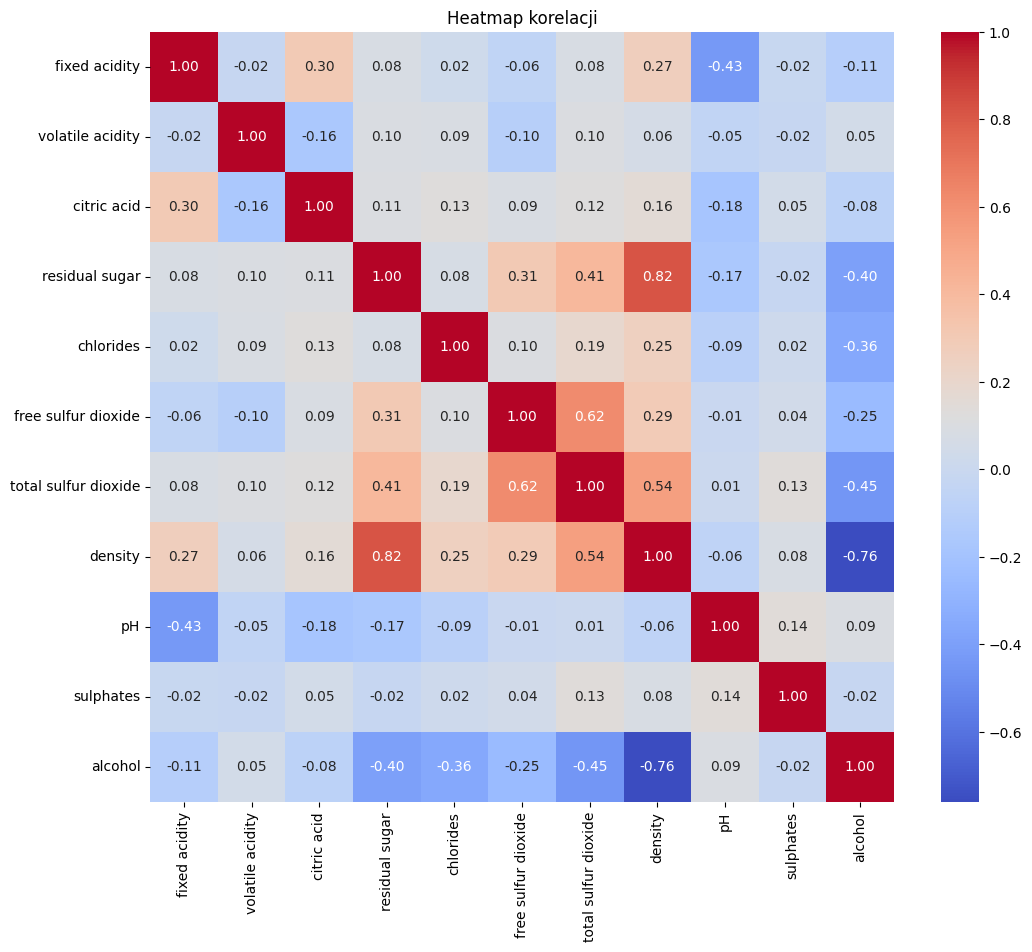

In [93]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap korelacji")
plt.show()